iter 0
	collapsed loglike = -38908.993048
	K = 7
	alpha = 1.000000
	sigma_x = 1.000000
	sigma_a = 1.000000
Learned weights (rounded)
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]]
True weights
[[0 1 0 0 0 0]
 [1 1 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[0 0 0 1 1 1]
 [0 0 0 1 0 1]
 [0 0 0 1 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0

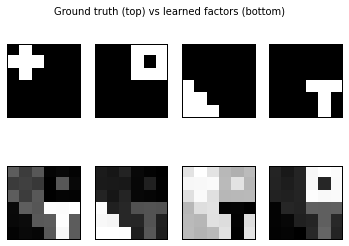

In [4]:
"""
Run IBP on the synthetic 'Cambridge Bars' dataset
"""
%matplotlib inline
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as P
from scaledimage import scaledimage

import sys
import cPickle as CP

import numpy as NP
import scipy.io as SPIO

from PyIBP import PyIBP as IBP

# IBP parameter (gamma hyperparameters)
(alpha, alpha_a, alpha_b) = (1., 1., 1.)
# Observed data Gaussian noise (Gamma hyperparameters)
(sigma_x, sx_a, sx_b) = (1., 1., 1.)
# Latent feature weight Gaussian noise (Gamma hyperparameters)
(sigma_a, sa_a, sa_b) = (1., 1., 1.)

# Number of full sampling sweeps
numsamp = 5

# Load the data
matvals = SPIO.loadmat('block_image_set.mat')
trueWeights = matvals['trueWeights']
features = matvals['features']
data = matvals['data']

# Center the data
(N,D) = data.shape
cdata = IBP.centerData(data)

# Initialize the model
f = IBP(cdata,(alpha,alpha_a,alpha_b),
        (sigma_x, sx_a, sx_b),
        (sigma_a, sa_a, sa_b))

# Do inference
for s in range(numsamp):
    # Print current chain state
    f.sampleReport(s)
    print 'Learned weights (rounded)'
    for factor in NP.round(f.weights()).astype(NP.int):
        print str(factor.reshape((6,6)))
    print 'True weights'
    for factor in trueWeights:
        print str(factor.reshape((6,6)))    
    # Take a new sample
    f.fullSample()    

# If matplotlib is installed, plot ground truth vs learned factors
# try:
#     import matplotlib.pyplot as P
#     from scaledimage import scaledimage
# except:
#     print 'matplotlib not installed, skipping visualization...'
#     sys.exit(0)

# Intensity plots of
# -ground truth factor-feature weights (top)
# -learned factor-feature weights (bottom)
K = max(len(trueWeights), len(f.weights()))
(fig, subaxes) = P.subplots(2, K)
for sa in subaxes.flatten():
    sa.set_visible(False)
fig.suptitle('Ground truth (top) vs learned factors (bottom)')
for (idx, trueFactor) in enumerate(trueWeights):
    ax = subaxes[0, idx]
    ax.set_visible(True)
    scaledimage(trueFactor.reshape(6,6),
                pixwidth=3, ax=ax)
for (idx, learnedFactor) in enumerate(f.weights()):
    ax = subaxes[1, idx]    
    scaledimage(learnedFactor.reshape(6,6),
                pixwidth=3, ax=ax)
    ax.set_visible(True)
P.savefig('PyIBP_comparison.png')